# KNN CLASSIFICATION


In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data  = pd.read_csv(r"C:\Users\91863\Downloads\pima-indians-diabetes.data.csv")
data.columns= ["preq","plas","pres","skin","test","mass","pedi","age","class"]
data.head()

,preq,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
data.shape

(767, 9)

In [4]:
array = data.values
x = array[:,0:8]
y = array[:,8]



In [5]:
num_folds = 10
kfold = KFold(n_splits=10)

In [6]:
model= KNeighborsClassifier(n_neighbors =17)    
results  =cross_val_score(model,x,y,cv=kfold)

In [7]:
results.mean()

0.7537252221462747

#  grid search for algorithm tuning for finding k-value

In [8]:
# grid search fo algorithm tuning to get k- value with high accuracy

from sklearn.model_selection import GridSearchCV

In [9]:
x = array[:,0:8]
y = array[:,8]
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [10]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [11]:
model = KNeighborsClassifier()
grid= GridSearchCV(estimator = model,param_grid = param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [12]:
grid.best_score_

0.7588489941431117

In [13]:
grid.best_params_

{'n_neighbors': 14}

#  vvisualizing the CV results

In [14]:
# choose  k between 1 to 41 

k_range = range(1,41)
k_scores=[]
# use iteration to calculate different k in modls, then return the average accuraccy based on the cros validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores =cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

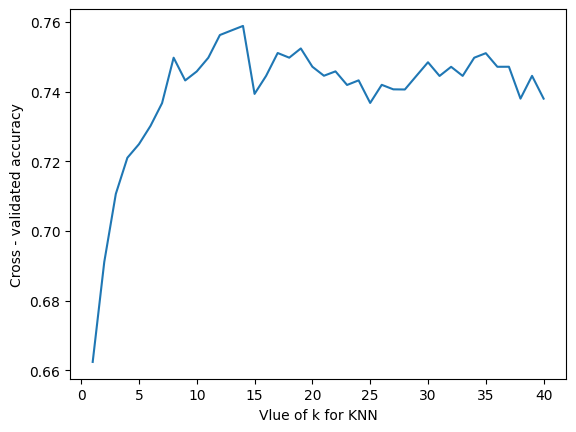

In [15]:
# plot to see clearly

plt.plot(k_range,k_scores)
plt.xlabel("Vlue of k for KNN")
plt.ylabel("Cross - validated accuracy")
plt.show()

In [16]:
k_scores

[0.6623885918003565,
 0.6910703675409557,
 0.7106272812155165,
 0.7209999151175622,
 0.7248960190136661,
 0.7301502419149478,
 0.7366861896273661,
 0.7497241320770732,
 0.7431966726084374,
 0.7457855869620575,
 0.7497156438332908,
 0.7562346150581446,
 0.7575502928444106,
 0.7588489941431117,
 0.7393345216874628,
 0.7445208386384857,
 0.7510737628384687,
 0.7497326203208556,
 0.7523809523809524,
 0.747135217723453,
 0.7445463033698327,
 0.7458025634496224,
 0.741897971309736,
 0.7432221373397845,
 0.7367371190900602,
 0.7419404125286478,
 0.7406417112299465,
 0.7405992700110346,
 0.7445208386384856,
 0.7484169425345896,
 0.7444868856633563,
 0.7471097529921059,
 0.744503862150921,
 0.7497241320770732,
 0.7510228333757746,
 0.7471182412358883,
 0.7471267294796706,
 0.737976402682285,
 0.7445123503947033,
 0.737976402682285]